In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.graphics.regressionplots import plot_regress_exog
from statsmodels.graphics.regressionplots import plot_partregress
from statsmodels.graphics.regressionplots import plot_ccpr
from statsmodels.graphics.regressionplots import plot_ccpr_grid

In [17]:
df = pd.read_csv('C:/Users/KahindiE/Desktop/data_science/Student_performance_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [18]:
df.columns #to check the column names

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [19]:
df.shape # Checking number of rows and columns

(2392, 15)

In [20]:
df.isnull().sum()#checking for null values

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [21]:
df.dtypes #checking the data types of the columns

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [22]:
df.duplicated().sum() #checking for duplicates

0

In [25]:
df[['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences']]

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences
0,17,1,0,2,19.833723,7
1,18,0,0,1,15.408756,0
2,15,0,2,3,4.210570,26
3,17,1,0,3,10.028829,14
4,17,1,0,2,4.672495,17
...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2
2388,17,0,0,1,7.583217,4
2389,16,1,0,2,6.805500,20
2390,16,1,1,0,12.416653,17


In [27]:
df[['Age']]

,Age
0,17
1,18
2,15
3,17
4,17
...,...
2387,18
2388,17
2389,16
2390,16


In [31]:
#filtering agewise data
df_age_16_18 = df[(df['Age'] >= 16) & (df['Age'] <= 18)] #filtering data between 16 and 18
df_age_16_18.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0


In [50]:
filter_by_gender=df['Gender']==1 #filtering data by gender
filter_by_gender 

0        True
1       False
2       False
3        True
4        True
        ...  
2387     True
2388    False
2389     True
2390     True
2391     True
Name: Gender, Length: 2392, dtype: bool

In [51]:
#filtering gender and GPA data
df_filter_by_gender__GPA = df[(df['Gender'] == 1)  & (df['GPA']) ] #filtering data between 16 and 18
df.loc[filter_by_gender, ['Gender', 'GPA']] 


,Gender,GPA
0,1,2.929196
3,1,2.054218
4,1,1.288061
7,1,1.360143
9,1,3.573474
...,...,...
2385,1,1.395631
2387,1,3.455509
2389,1,1.142333
2390,1,1.803297


In [55]:
df.iloc[1000:1005, 0:5] #selecting first 1000:1005 rows and first 5 columns

,StudentID,Age,Gender,Ethnicity,ParentalEducation
1000,2001,16,1,2,0
1001,2002,17,1,0,3
1002,2003,15,0,3,1
1003,2004,15,0,3,3
1004,2005,15,1,2,4


In [57]:
df.describe( ) #describing the data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Text(0, 0.5, 'GPA')

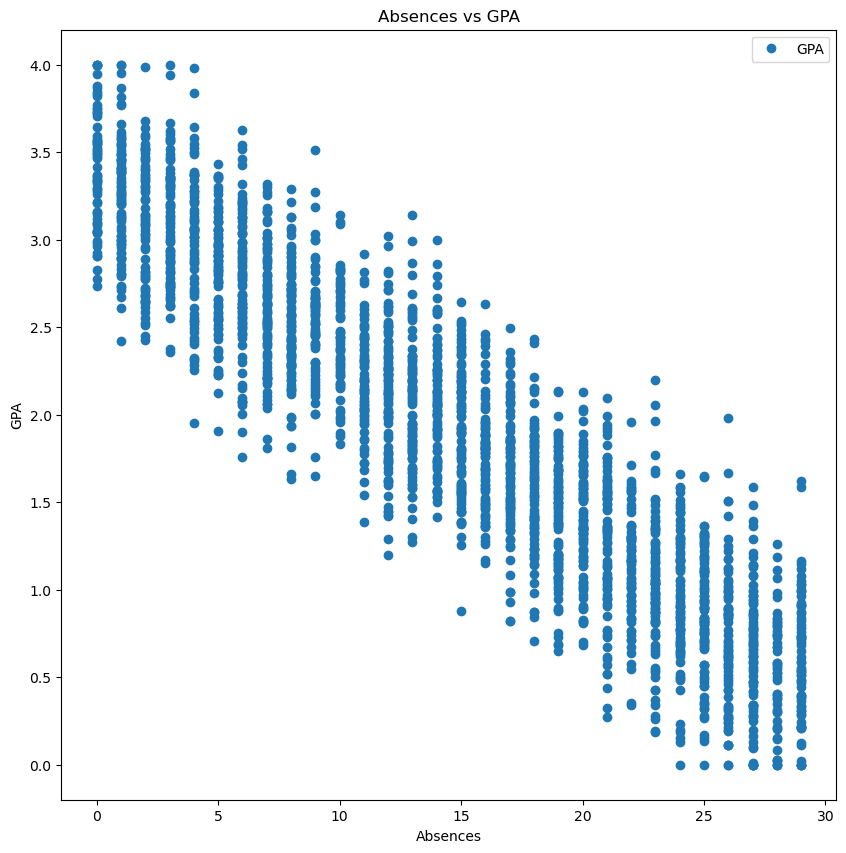

In [67]:
df.plot(x='Absences', y='GPA', style='o', figsize=(10,10)) #plotting the data
plt.title('Absences vs GPA')
plt.xlabel('Absences')
plt.ylabel('GPA')

In [79]:
X= df[['Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences']] # X contains all the independent variables
y= df['GPA'] #target variable
#define 'train_test_split' function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% testX = sm.add_constant(
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              1844.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):                        0.00
Time:                        13:17:34   Log-Likelihood:                         -3293.8
No. Observations:                2392   AIC:                                      6598.
Df Residuals:                    2387   BIC:                                      6626.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.5143      0.038     13.636      0.000       0.440       0.588
Ethnicity             0.2145      0.019     11.564      0.000       0.178       0.251
ParentalEducation     0.4485      0.017     26.274      0.000       0.415       0.482
StudyTimeWeekly       0.1119      0.003     37.434      0.000       0.106       0.118
Absences             -0.0475      0.002    -23.406      0.000      -0.051      -0.043
==============================================================================
Omnibus:                        8.288   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.626
Skew:                          -0.096   Prob(JB):                       0.0221
Kurtosis:                       2.800   Cond. No.                         37.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

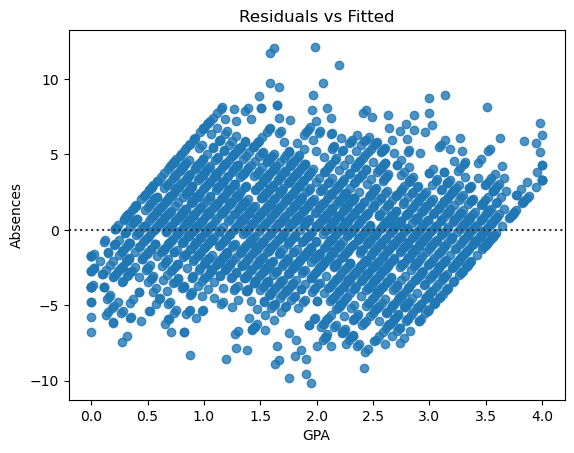

In [70]:

#Residuals vs Fitted
sns.residplot(x = 'GPA', y = 'Absences', data = df)
plt.title('Residuals vs Fitted')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.show()

In [72]:
#Multicollinearity using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


             feature       VIF
0             Gender  1.886319
1          Ethnicity  1.631735
2  ParentalEducation  3.063732
3    StudyTimeWeekly  2.957599
4           Absences  3.024055


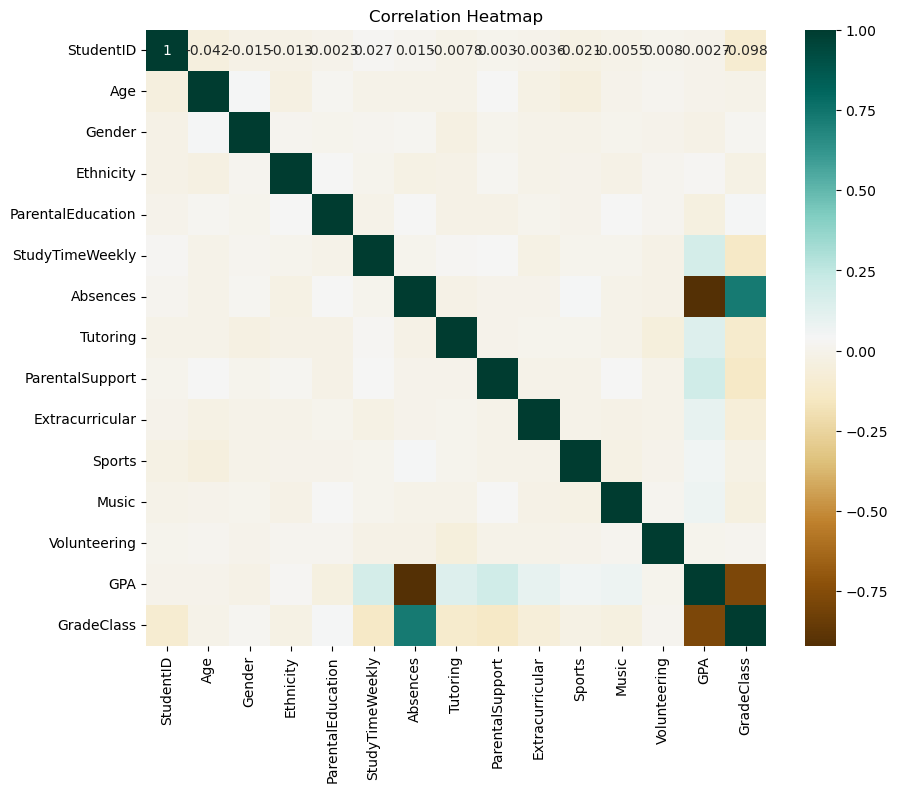

In [76]:
#heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

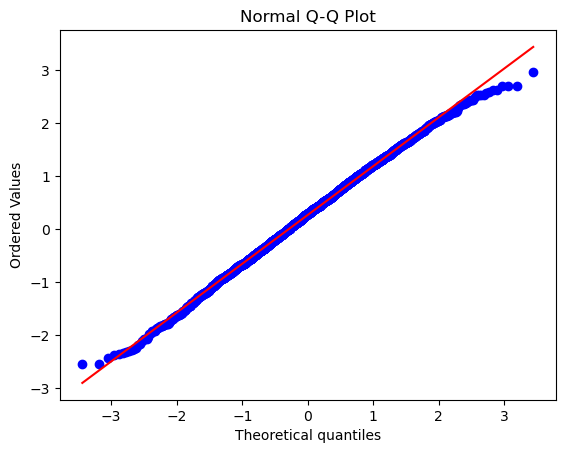

In [77]:
#Normality
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()